In [266]:
library(Seurat)
library(stringr)
library(RColorBrewer)
library(scales)
library(goseq)
library(viridis)

Loading required package: viridisLite

Attaching package: ‘viridis’

The following object is masked from ‘package:scales’:

    viridis_pal



In [213]:
cols = read.csv("../Table/celltype_colors.csv")

In [214]:
cols[2, "celltype"] = "Endothelial"

In [215]:
geneinfo = read.table("/publicdata/gencode_v19_20151104/gene_info.tsv", sep = "\t", header = T)

In [216]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.analyzed.filtered.clustered_finalAnnotation", sep = "")
load(f, verbose = T)

Loading objects:
  tiss.filtered


# Figure 4A

In [222]:
PlotUMAP <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    if(length(cols2use) > 0){colrs = data.frame(clusters = unique(umap$clusters), color = cols2use)}
    else{colrs = data.frame(clusters = sort(unique(umap$clusters)), color = my_color_palette)}
    umap$color = colrs[match(umap$clusters, colrs$clusters), "color"]
    

    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        legend(lX, lY,
               legend = colrs$clusters,
               col    = colrs$color,
               pch    = rep(16, nrow(colrs)),
               cex=.9,
               bg="transparent",
               box.lty = 0,
               y.intersp = 1.75,
               ncol = n.col,
               x.intersp = 1.15,
               text.width = text_width)
    }
    
    return(colrs)
    
}

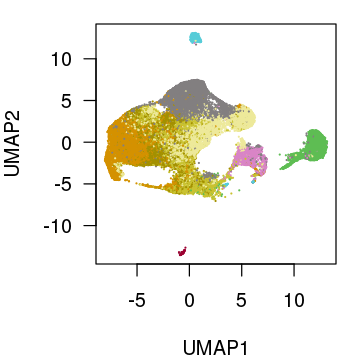

In [219]:
x = PlotUMAP(tiss.filtered, "major_cell_population", 3, 13, text_width = 2, n.col = 2, plot_leg = F,
             cols2use = cols[cols$celltype %in% unique(tiss.filtered@meta.data$major_cell_population), ]$col[c(3, 7, 9, 4, 8, 5, 6, 1, 2)])

# Figure 1C

In [223]:
PlotFractionCluster <- function(){
    barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$major_cell_population))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
    barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
    barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
    barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
    barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
    barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

    barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 6], -barfrac_fractions[, 5]), ]

    my_color_palette <- hue_pal()(ncol(barfrac_fractions))

    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

    barplot(t(barfrac_fractions), names.arg = str_split_fixed(colnames(t(barfrac_fractions)), "_", 3)[, 3], las = 2,
            col = cols[cols$celltype %in% unique(tiss.filtered@meta.data$major_cell_population), ]$col, #[c(3, 7, 9, 4, 8, 5, 6, 1, 2)],
            ylab = "Cluster (%)")
}

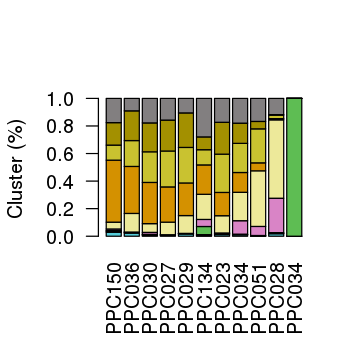

In [224]:
PlotFractionCluster()

# Vs FACS

In [227]:
t1 = read.csv("../Table/PPC_pilot_sequenced_samples.csv")[1:12,]
t1.temp = t1[! is.na(t1$PDX1_NKX61), ]
t1.temp = t1.temp[order(-t1.temp$PDX1_NKX61),]
t1.temp$UDID = gsub("_", "", t1.temp$UDID)
t1.temp = t1.temp[! t1.temp$UDID == "PPC069", ]

In [310]:
PlotFractionClusterVSFACS <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    
    
    barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$major_cell_population))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
    barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
    barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
    barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
    barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
    barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

    barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 6], -barfrac_fractions[, 5]), ]
    
    my_color_palette <- hue_pal()(ncol(barfrac_fractions))

    barfrac_fractions = cbind(barfrac_fractions, gsub("_", "", str_split_fixed(rownames(barfrac_fractions), "_", 3)[,3]))
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions)], t1.temp$UDID), "PDX1_NKX61"]  )
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 1], t1.temp$UDID), "PDX1"]  )
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 2], t1.temp$UDID), "NKX61"]  )

    barfrac_fractions = barfrac_fractions[1:nrow(barfrac_fractions)-1, ] #remove iPSC
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
#     my_color_palette <- hue_pal()(length(unique(umap$clusters)))

    barfrac_fractions = as.data.frame(barfrac_fractions)
    
    x = (as.numeric(barfrac_fractions[,7]) + as.numeric(barfrac_fractions[,8]) + as.numeric(barfrac_fractions[,9])) * 100
    y = as.numeric(barfrac_fractions[,"V11"])

    plot(x, y, col = col_vector, pch = 19, cex = 1.5, las = 1, xlim = c(0,100), ylim = c(0,100),
         xlab = "% Clusters 0", ylab = "% PDX1+/NKX6.1+")
    
    
    text(x, y, rownames(barfrac_fractions), cex = .5)
    
    abline(lm(y ~ x),col = "black")
    p = round(cor.test(y , x, method = "spearman")$p.val, 3)
    rho = round(as.numeric(str_split_fixed(cor.test(y , x, method = "pearson")$estimate, ":", 2)[1]), 2)
    text(0, 90, paste("p = ", p, sep = ""), pos = 4)
    text(0, 80, paste("r = ", rho, sep = ""), pos = 4)
    
#     return(barfrac_fractions)
#     print(rho)
#     print(p)

}

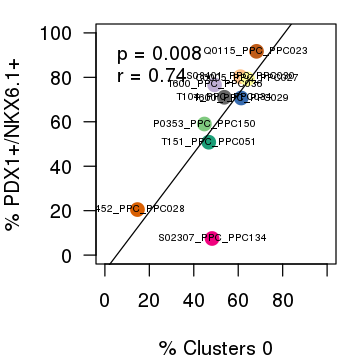

In [311]:
PlotFractionClusterVSFACS()


# Figure 4C

In [257]:
Idents(tiss.filtered) = 'major_cell_population'

In [258]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

iPSC_markers        = read.table(paste(out, "iPSC_markers.txt", sep = ""))
repl_markers        = read.table(paste(out, "repl_markers.txt", sep = ""))
ppc_markers         = read.table(paste(out, "all.ppc_markers.txt", sep = ""))
Endocrine_markers   = read.table(paste(out, "Endocrine_markers.txt", sep = ""))

mesenchymal_markers = read.table(paste(out, "mesenchymal_markers.txt", sep = ""))
endothelial_markers = read.table(paste(out, "endothelial_markers.txt", sep = ""))


In [324]:
# rownames(iPSC_markers)[1:5]
# rownames(ppc_markers)[1:5]
# rownames(repl_markers)[1:5]
# rownames(Endocrine_markers)[1:5]
rownames(mesenchymal_markers)[1:5]
# rownames(endothelial_markers)[1:5]

[1] "MIR205HG" "ANXA1"    "SLC2A3"   "COL3A1"   "CRABP2"

In [259]:
top5.eachcelltype = c(rownames(iPSC_markers)[1:5],
                      rownames(ppc_markers)[1:5],
                      rownames(repl_markers)[1:5],
                      rownames(Endocrine_markers)[1:5],
                      rownames(mesenchymal_markers)[1:5],
                      rownames(endothelial_markers)[1:5])

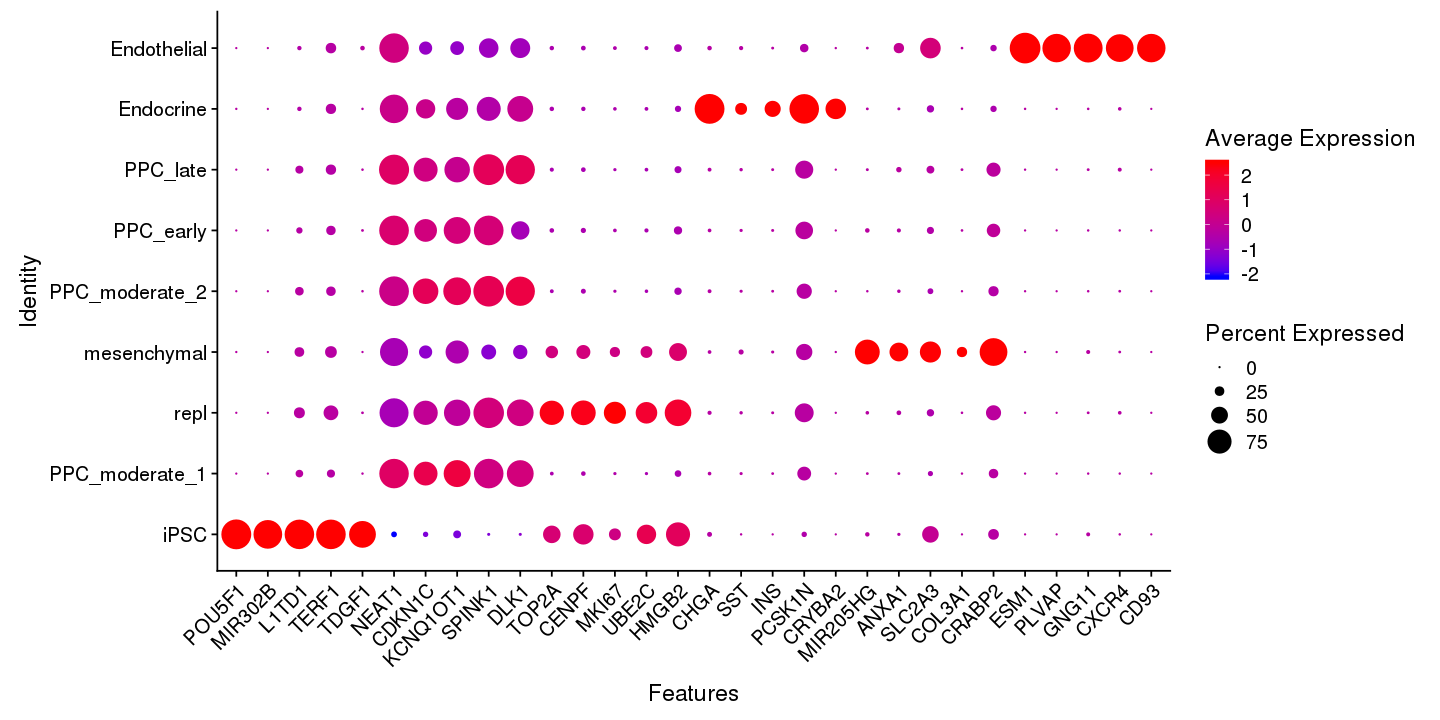

In [260]:
options(repr.plot.width = 12, repr.plot.height = 6)
DotPlot(tiss.filtered, features = rev(top5.eachcelltype), cols = c("blue", "red"), dot.scale = 8) + RotatedAxis()

# Figure 4D

In [261]:
gowall_ipsc        = read.table(paste(out, "gowall_ipsc.txt", sep = ""))
gowall_repl        = read.table(paste(out, "gowall_repl.txt", sep = ""))
gowall_mesenchyme  = read.table(paste(out, "gowall_mesenchyme.txt", sep = ""))
gowall_endocrine   = read.table(paste(out, "gowall_endocrine.txt", sep = ""))
gowall_endothelial = read.table(paste(out, "gowall_endothelial.txt", sep = ""))
gowall_ppc         = read.table(paste(out, "gowall_ppc.txt", sep = ""))

In [293]:
plot_go_barplots <- function(table, t){
    
    par(mar = c(4, 15, 2, 1))
    
    if(length(table[table$bh == 0, ]$bh) > 0){
        table[table$bh == 0, ]$bh = 10e-100
    }

    
    barplot(-log(table$bh[5:1], 10), names.arg=table$term[5:1], horiz=T, main=t,
            las=1, cex.axis=1, cex.names=1.1, xlab = "-log10(p-value)")
    abline(v=1.3, lwd=2, lty=2, col="red")
    
}

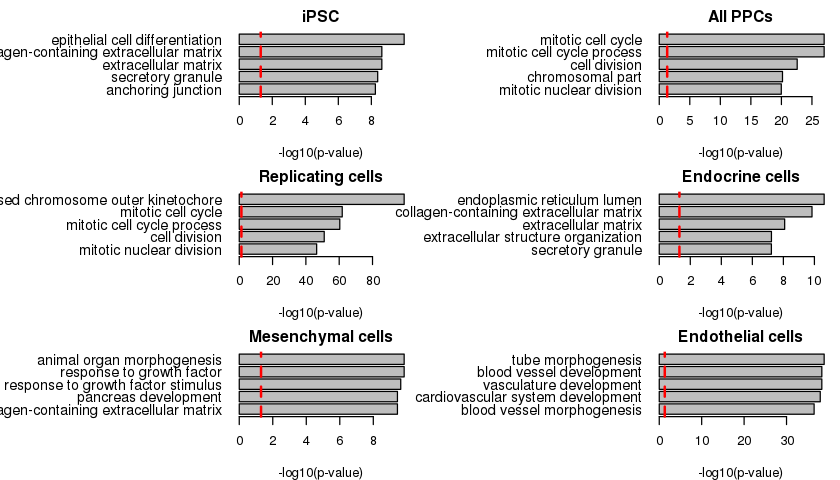

In [263]:
par(mfrow = c(3,2))
options(repr.plot.width = 7, repr.plot.height = 4)

plot_go_barplots(gowall_ipsc       , "iPSC")
plot_go_barplots(gowall_ppc        , "All PPCs")
plot_go_barplots(gowall_repl       , "Replicating cells")
plot_go_barplots(gowall_endocrine  , "Endocrine cells")
plot_go_barplots(gowall_mesenchyme , "Mesenchymal cells")
plot_go_barplots(gowall_endothelial, "Endothelial cells")


# Figure 4E - overlaid pseudotime

In [195]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.integrated.frazer.melton_cluster0_seurat_obj", sep = "")
load(f, verbose = T)

Loading objects:
  integrated.C0_test


In [269]:
tiss.filtered@meta.data$pseudotime = integrated.C0_test@meta.data[match(rownames(tiss.filtered@meta.data),
                                                                        rownames(integrated.C0_test@meta.data)), "pseudotime"]

In [270]:
unique(tiss.filtered@meta.data$major_cell_population)

[1] "iPSC"           "PPC_moderate_1" "repl"           "mesenchymal"   
[5] "PPC_moderate_2" "PPC_early"      "PPC_late"       "Endocrine"     
[9] "Endothelial"

In [271]:
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population == "iPSC", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population == "Endothelial", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population == "Endocrine", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population == "mesenchymal", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population == "repl", ]$pseudotime = NA

In [272]:
PlotUMAPContinuous <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    

#     rbPal <- colorRampPalette(c('red', "yellow", 'blue'))
    umap$color <- plasma(10)[as.numeric(cut(umap$clusters,breaks = 10))]

    
    non_ppc = umap[is.na(umap$color), ]
    
    plot(non_ppc[, 1], non_ppc[, 2],
        pch = 19, 
        col = "grey", 
        cex = .25,
        xlab = "UMAP1",
        ylab = "UMAP2",
        las = 1)

    umap$celltype = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), "major_cell_population"]
    umap[umap$celltype %in% c("iPSC", "Endothelial", "Endocrine", "mesenchymal", "repl"), ]$color = "grey"
    points(umap[, 1], umap[, 2],
         pch = 19, 
         col = umap$color,
         cex = .01)
    
    
}

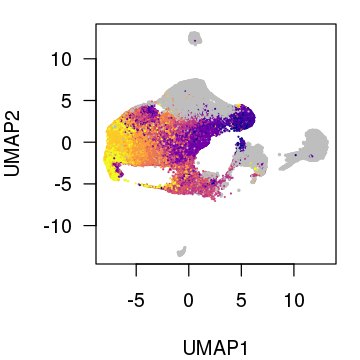

In [274]:
PlotUMAPContinuous(tiss.filtered, "pseudotime", 7, 16, text_width = 2, n.col = 2)

# 4F - LR results and Mfuzz (clusters 2 and 6)

In [9]:
library(ggplot2)

In [279]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
load(paste(out, "obj.integrated.frazer.melton_cluster0_pseudotime", sep = ""), verbose = T)
cds

In [11]:
# bin time by quantiles
pseudotime_ppc = as.data.frame(pseudotime(cds))
colnames(pseudotime_ppc) = "pseudotime"
quants = as.data.frame(quantile(pseudotime_ppc$pseudotime))

pseudotime_ppc$quants = NA
pseudotime_ppc$pseudotime = as.numeric(pseudotime_ppc$pseudotime)

pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[1, 1] & pseudotime_ppc$pseudotime <= quants[2, 1],  "quants" ] = "PPC_1"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[2, 1] & pseudotime_ppc$pseudotime <= quants[3, 1],  "quants" ] = "PPC_2"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[3, 1] & pseudotime_ppc$pseudotime <= quants[4, 1],  "quants" ] = "PPC_3"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[4, 1] & pseudotime_ppc$pseudotime <= quants[5, 1],  "quants" ] = "PPC_4"


pData(cds)$pseudotime_quantile = pseudotime_ppc[match(rownames(pData(cds)), rownames(pseudotime_ppc)), "quants"]

In [12]:
cds_subset <- cds[, colData(cds)$study %in% "Frazer"]

In [144]:
# Changes over PPC time

out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

lm_fit_coefs = read.table(paste(out, "ppc_fit_coefs_frazer_ppc_allexpressedgenes.txt", sep = ""))
lm_fit_coefs_sig = lm_fit_coefs[lm_fit_coefs$q_value < 0.05, ]
mfuzz = read.table(paste(out, "mfuzz_k10_b4_memberships.txt", sep = ""))

In [145]:
g2 = mfuzz[mfuzz$maxCol == 2 & mfuzz$real == TRUE,]
g6 = mfuzz[mfuzz$maxCol == 6 & mfuzz$real == TRUE,]

## Bar plot summaryizing

In [276]:
PlotPPCChangeOverTime <- function(){

    barplot(c(nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, ]), nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, ]),
            nrow(g2), nrow(g6)),
            las = 1, ylim = c(0, 1400),
            names.arg = c("Up", "Down", "Mid-up", "Mid-down")
    )
    
}

In [326]:
c(nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, ]), nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, ]),
            nrow(g2), nrow(g6))

[1]  982  148 1364   45

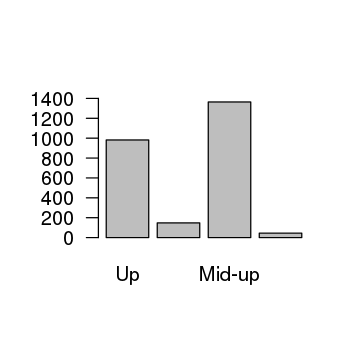

In [278]:
PlotPPCChangeOverTime()

## Gene expression change

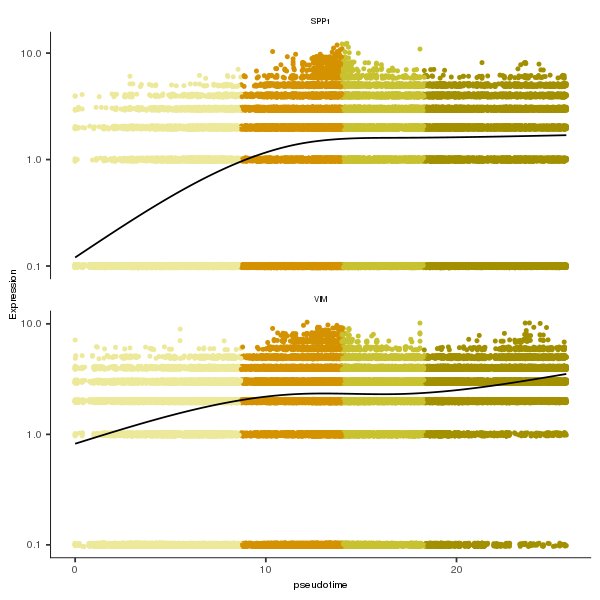

In [188]:
# genes = c(lm_fit_coefs_sig[order(-abs(lm_fit_coefs_sig$estimate)), "gene_short_name"][1:2])

# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]


genes = c("VIM", "SPP1")

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [280]:
genes = c(lm_fit_coefs_sig[order((lm_fit_coefs_sig$estimate)), "gene_short_name"][1:2])

genes

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

[1] "GPC3"  "TXNIP"

In [20]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
integrated.C0_test_PPC_1 = read.table(paste(out, "integrated_PPC_1_markers.txt", sep = ""))
integrated.C0_test_PPC_2 = read.table(paste(out, "integrated_PPC_2_markers.txt", sep = ""))
integrated.C0_test_PPC_3 = read.table(paste(out, "integrated_PPC_3_markers.txt", sep = ""))
integrated.C0_test_PPC_4 = read.table(paste(out, "integrated_PPC_4_markers.txt", sep = ""))

In [22]:
PPC_sigs = c(rownames(integrated.C0_test_PPC_1), rownames(integrated.C0_test_PPC_2), rownames(integrated.C0_test_PPC_3), rownames(integrated.C0_test_PPC_4))

In [76]:
# PPC_sigs

In [121]:
g2 = mfuzz[mfuzz$maxCol == 2 & mfuzz$real == TRUE,]
# g2 = g2[g2$X2 > 0.956767,]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AC0", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AC1", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AL", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^Y-RNA.", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^CTD-", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^RN7", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^RNU", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^RP", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^SNO", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^sno", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AP", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^MT", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^SLC", rownames(g2))],]


In [147]:
expressionBinned2model2mfuzz = read.table("/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/ppc_expression_binpseudo4.txt")
expressionBinned2model2mfuzz$meanRow = rowMeans(expressionBinned2model2mfuzz)

In [152]:
expressionBinned2model2mfuzz = expressionBinned2model2mfuzz[rownames(g2), ] 
expressionBinned2model2mfuzz[expressionBinned2model2mfuzz$meanRow > .05,]

,time_1,time_2,time_3,time_4,meanRow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADAMTS18,0.05210639,0.05357891,0.07625951,0.05011269,0.05801437
CAPN6,0.17317110,0.17757650,0.22603710,0.17085700,0.18691042
FOXJ1,0.09117654,0.09230505,0.10826820,0.08963653,0.09534658
RAPGEF6,0.05905883,0.05811497,0.06702377,0.05843188,0.06065736
TRIM3,0.06753170,0.07213291,0.09684375,0.06912888,0.07640931


In [161]:
head(expressionBinned2model2mfuzz[order(-expressionBinned2model2mfuzz$time_3),], 10)

,time_1,time_2,time_3,time_4,meanRow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAPN6,0.17317110,0.177576500,0.22603710,0.17085700,0.18691042
FOXJ1,0.09117654,0.092305050,0.10826820,0.08963653,0.09534658
TRIM3,0.06753170,0.072132910,0.09684375,0.06912888,0.07640931
ADAMTS18,0.05210639,0.053578910,0.07625951,0.05011269,0.05801437
RAPGEF6,0.05905883,0.058114970,0.06702377,0.05843188,0.06065736
INVS,0.02531136,0.024991700,0.02983767,0.02528785,0.02635714
CAPN9,0.01308311,0.011894720,0.02042795,0.01280208,0.01455197
XYLT1,0.01564481,0.015564190,0.01798180,0.01557204,0.01619071
RWDD3,0.01431444,0.014364790,0.01612148,0.01453694,0.01483441


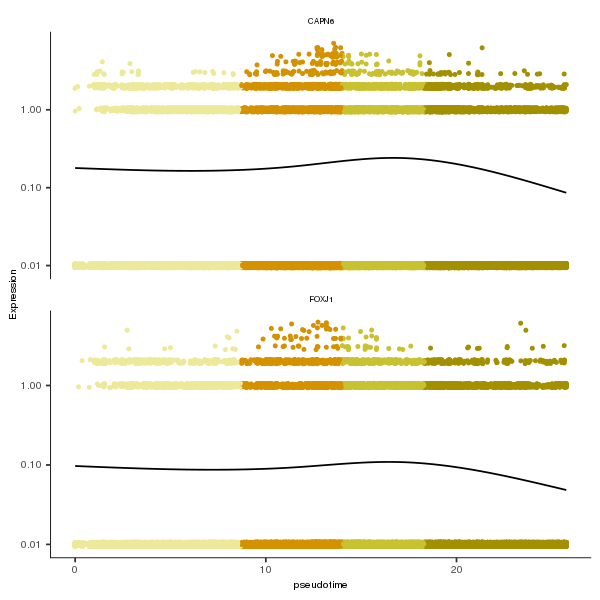

In [162]:
# genes = c("HECTD1", "RBPJ")

genes = c("CAPN6", "FOXJ1")

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.01) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [32]:
g6[ rownames(g6) %in% PPC_sigs, ]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
CTSH,0.03543374,0.02958212,0.05132402,0.02848180,0.07240783,0.5963749,0.05438034,0.03623863,0.06937660,0.02640000,6,TRUE
FKBP1A,0.02199418,0.02048765,0.03020300,0.01831046,0.04116371,0.7287678,0.04187968,0.02612148,0.05346156,0.01761052,6,TRUE
ILF2,0.02890340,0.02881359,0.03807044,0.02512406,0.04995188,0.6108411,0.06702658,0.03898295,0.08774792,0.02453811,6,TRUE


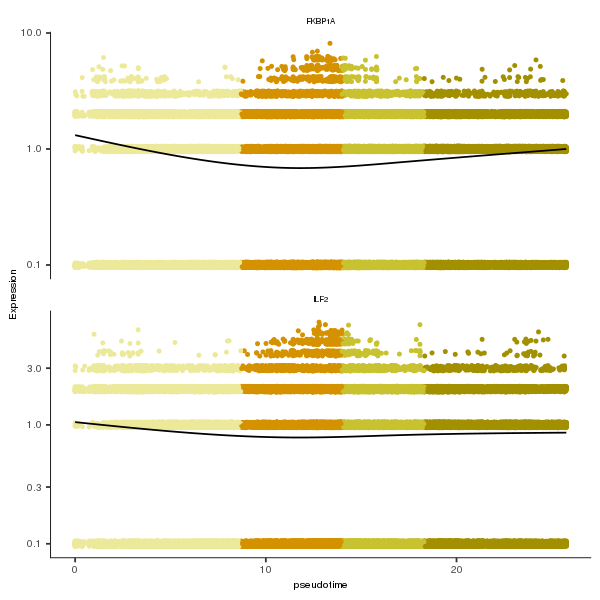

In [29]:

genes = c("FKBP1A", "ILF2")

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [15]:
mfuzz["PDX1",]
mfuzz["NKX6-1",]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
PDX1,0.07995882,0.07276209,0.04761576,0.112359,0.03903248,0.03345985,0.03841575,0.05407533,0.03530536,0.4870156,10,FALSE


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
NKX6-1,0.04757008,0.06623877,0.03316781,0.08232437,0.02896533,0.02877303,0.03892089,0.06350636,0.03424926,0.5762841,10,TRUE


## GO on each set

## analyze genes from up and down
(mid.up and mid.down were calculated in 0.6_PPC_GO notebook)

In [189]:
## GO enrichment
FindGOenrichment <- function(genes, all.genes){
    
    list1 = genes
    list2 = all.genes

    genes_data = data.frame(gene = list2, inlist = 0, stringsAsFactors = FALSE)
    genes_data[genes_data$gene %in% list1, "inlist"] = 1
    genes_data$gene_id = str_split_fixed(genes_data$gene, "\\.", 2)[,1]
    genes_data = genes_data[!duplicated(genes_data$gene_id),]
    rownames(genes_data) = genes_data$gene_id
    genes_data$gene_id = NULL

    genes = genes_data$inlist
    names(genes) = rownames(genes_data)
    pwf=nullp(genes,"hg19", "ensGene", plot.fit = FALSE)
    gowall=goseq(pwf,"hg19","ensGene")

    gowall = gowall[gowall$numInCat > 10 & gowall$numInCat < 1000,]
    
    gowall$list1      = length(genes_data[genes_data$inlist == 1, "inlist"])
    gowall$list2      = length(genes_data[genes_data$inlist == 0, "inlist"])
    gowall$pvalue     = apply(gowall[, c("over_represented_pvalue", "under_represented_pvalue")], 1, min)
    gowall$bonferroni = p.adjust(gowall$pvalue, method = "bonferroni")
    gowall$bh         = p.adjust(gowall$pvalue, method = "BH")
    gowall_ordered <- gowall[order(gowall$over_represented_pvalue),]
    
    return(gowall_ordered)
    
}

In [199]:
up = lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, "gene_short_name"]
down = lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, "gene_short_name"]

bg = rownames(integrated.C0_test)
bg = geneinfo[geneinfo$gene_name %in% bg, "gene_id"]

go_up =   FindGOenrichment(geneinfo[geneinfo$gene_name %in% up, "gene_id"], bg)
go_down = FindGOenrichment(geneinfo[geneinfo$gene_name %in% down, "gene_id"], bg)


Loading hg19 length data...
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 37644 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns
Loading hg19 length data...
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 37644 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


In [200]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
write.table(go_up, file = paste(out, "gowall_ppc_up.txt", sep = ""))
write.table(go_down, file = paste(out, "gowall_ppc_down.txt", sep = ""))

In [295]:
go_mid.up = read.table(paste(out, "gowall_ppc_mid.up.txt", sep = ""))
go_mid.down = read.table(paste(out, "gowall_ppc_mid.down.txt", sep = ""))

In [328]:
head(go_down)

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,list1,list2,pvalue,bonferroni,bh
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
379,GO:0000976,1.345135e-08,1,20,779,transcription regulatory region sequence-specific DNA binding,MF,148,56804,1.345135e-08,0.0001100051,4.399207e-05
380,GO:0000977,2.297371e-08,1,19,728,RNA polymerase II regulatory region sequence-specific DNA binding,MF,148,56804,2.297371e-08,0.0001878790,4.399207e-05
11729,GO:0044212,2.389574e-08,1,21,891,transcription regulatory region DNA binding,MF,148,56804,2.389574e-08,0.0001954193,4.399207e-05
411,GO:0001067,2.523572e-08,1,21,893,regulatory region nucleic acid binding,MF,148,56804,2.523572e-08,0.0002063777,4.399207e-05
397,GO:0001012,2.689659e-08,1,19,734,RNA polymerase II regulatory region DNA binding,MF,148,56804,2.689659e-08,0.0002199603,4.399207e-05
21887,GO:1990837,3.311775e-08,1,20,821,sequence-specific double-stranded DNA binding,MF,148,56804,3.311775e-08,0.0002708370,4.513950e-05


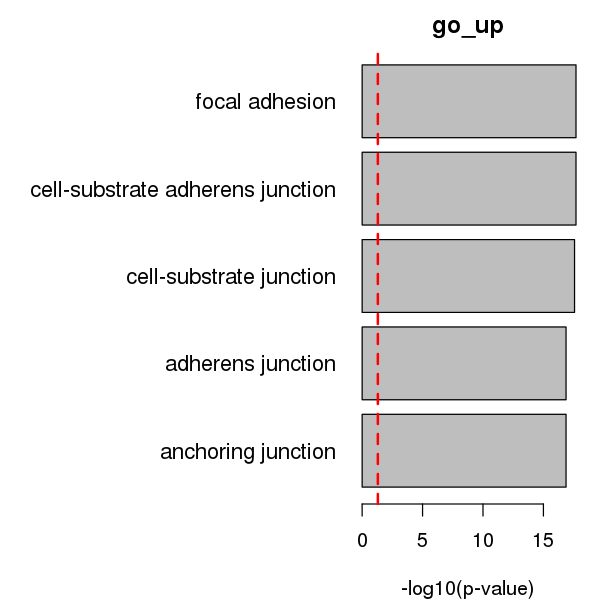

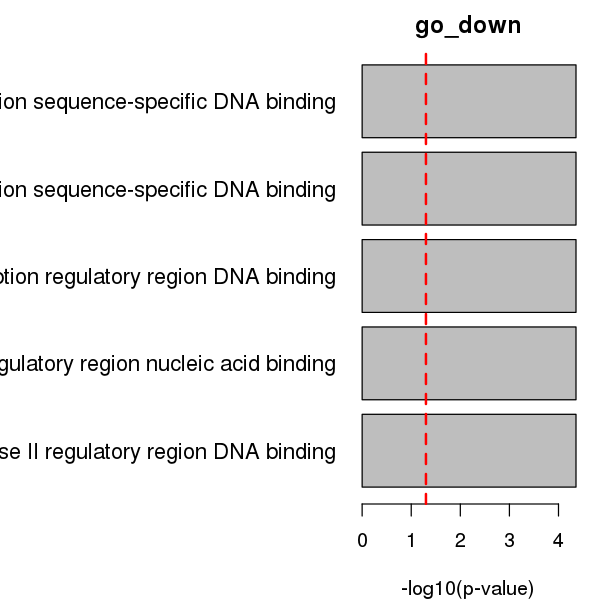

In [300]:
plot_go_barplots(go_up       , "go_up")
plot_go_barplots(go_down     , "go_down")

In [330]:
go_mid.down

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,list1,list2,pvalue,bonferroni,bh
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
9562,GO:0034660,1.478873e-08,1.0000000,35,526,ncRNA metabolic process,BP,543,34239,1.478873e-08,0.0001183246,0.0001183246
9483,GO:0034470,5.564146e-08,1.0000000,27,358,ncRNA processing,BP,543,34239,5.564146e-08,0.0004451873,0.0001522900
3162,GO:0006396,6.186103e-08,1.0000000,48,953,RNA processing,BP,543,34239,6.186103e-08,0.0004949501,0.0001522900
18352,GO:0098798,7.613547e-08,1.0000000,21,249,mitochondrial protein complex,CC,543,34239,7.613547e-08,0.0006091599,0.0001522900
10744,GO:0042254,2.203435e-07,0.9999999,22,272,ribosome biogenesis,BP,543,34239,2.203435e-07,0.0017629686,0.0003525937
11786,GO:0044429,5.548122e-07,0.9999998,47,979,mitochondrial part,CC,543,34239,5.548122e-07,0.0044390526,0.0007398421
2750,GO:0005730,1.105878e-06,0.9999996,46,968,nucleolus,CC,543,34239,1.105878e-06,0.0088481260,0.0011260122
8208,GO:0031966,1.289090e-06,0.9999995,35,652,mitochondrial membrane,CC,543,34239,1.289090e-06,0.0103140089,0.0011260122
5743,GO:0016072,1.486150e-06,0.9999997,19,234,rRNA metabolic process,BP,543,34239,1.486150e-06,0.0118906827,0.0011260122


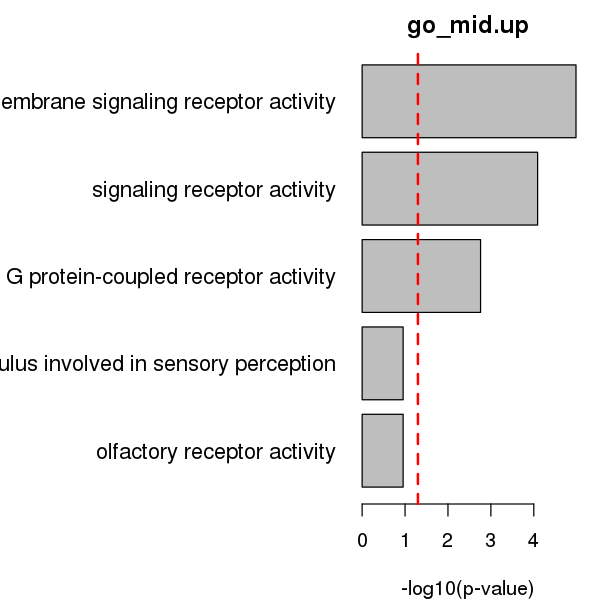

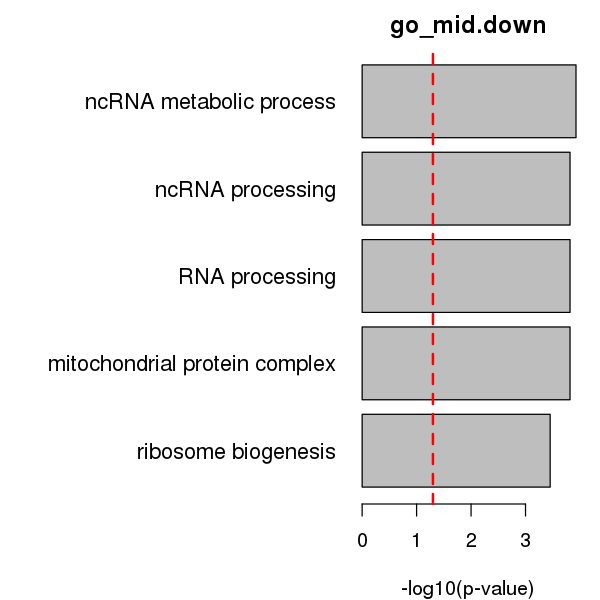

In [299]:
options(repr.plot.width = 5, repr.plot.height = 5)


plot_go_barplots(go_mid.up   , "go_mid.up")
plot_go_barplots(go_mid.down , "go_mid.down")

# 4F - GSEA results

In [288]:
gsea = read.table(paste(out, "ppc_fit_coefs_frazer_ppc_allexpressedgenes_gsea.txt", sep = ""))

In [291]:
plot_go_barplotsGSEA <- function(table, t){

    table$logq = -log(table$qval, 10)
    table[ table$stat.mean < 0, ]$logq = table[ table$stat.mean < 0, ]$logq*-1
    
    barplot(table$logq, names.arg=table$id, horiz=T, main=t,
            las=1, cex.axis=1, cex.names=0.5)
    abline(v=1.3, lwd=2, lty=2, col="red")
    abline(v=-1.3, lwd=2, lty=2, col="red")
    
}

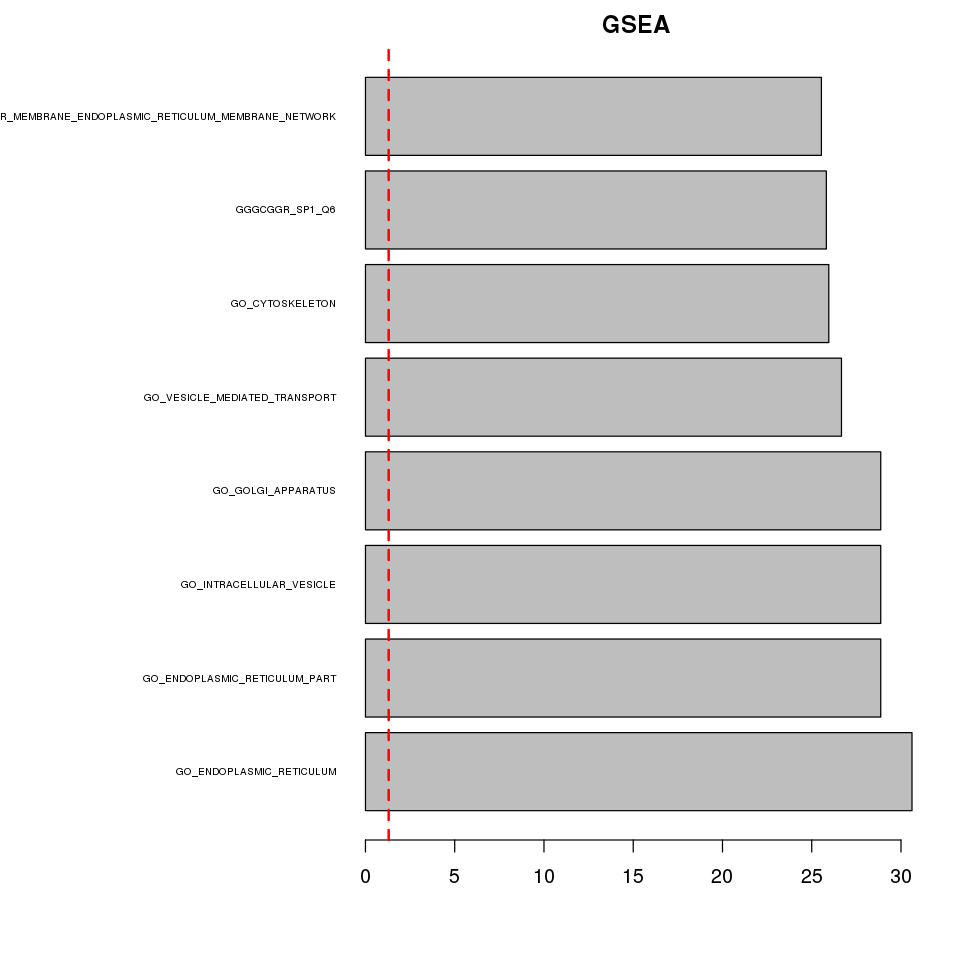

In [292]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 15, 2, 2))
a = subset(gsea, qval < 10e-25)
plot_go_barplotsGSEA(a[order(a$qval),], "GSEA")

# Write out

In [305]:
out = "../Figures/Manuscript_V04/Figure_4_"


png(paste(out, "UMAP_byCelltype.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(tiss.filtered, "major_cell_population", 3, 13, text_width = 2, n.col = 2,
             plot_leg = F, cols2use = cols[cols$celltype %in% unique(tiss.filtered@meta.data$major_cell_population), ]$col[c(3, 7, 9, 4, 8, 5, 6, 1, 2)])
dev.off()

pdf(paste(out, "FACS_barplot.pdf"), width = 4, height = 3)
PlotFractionCluster()
dev.off()

pdf(paste(out, "FACS_PPC_scatter.pdf"), width = 3, height = 3)
PlotFractionClusterVSFACS()
dev.off()


pdf(paste(out, "DotPlot_top5DE.pdf"), width = 12, height = 6)
DotPlot(tiss.filtered, features = rev(top5.eachcelltype), cols = c("blue", "red"), dot.scale = 8) + RotatedAxis()
dev.off()

pdf(paste(out, "GO_DEbycelltype.pdf"), width = 7, height = 4)
par(mfrow = c(3,2))
plot_go_barplots(gowall_ipsc       , "iPSC")
plot_go_barplots(gowall_ppc        , "All PPCs")
plot_go_barplots(gowall_repl       , "Replicating cells")
plot_go_barplots(gowall_endocrine  , "Endocrine cells")
plot_go_barplots(gowall_mesenchyme , "Mesenchymal cells")
plot_go_barplots(gowall_endothelial, "Endothelial cells")
dev.off()

png(paste(out, "UMAP_byPPC_pseudotime.png"), width = 3, height = 3, units = "in", res = 1200)
PlotUMAPContinuous(tiss.filtered, "pseudotime", 7, 16, text_width = 2, n.col = 2)
dev.off()


pdf(paste(out, "Barplot_n_genesDelta_ppc.pdf"), width = 3, height = 3)
PlotPPCChangeOverTime()
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [ ]:
# png(paste(out, "Expression_over_pseudotime_up.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("VIM", "SPP1")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()


# png(paste(out, "Expression_over_pseudotime_down.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("GPC3", "TXNIP")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()


# png(paste(out, "Expression_over_pseudotime_midup.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("CAPN6", "FOXJ1")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()

# png(paste(out, "Expression_over_pseudotime_middown.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("FKBP1A", "ILF2")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()

png 
  2

png 
  2

In [319]:
png(paste(out, "Expression_over_pseudotime_up.png"), width = 5, height = 5, units = "in", res = 1200)
genes = c("VIM", "SPP1")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()


png(paste(out, "Expression_over_pseudotime_down.png"), width = 5, height = 5, units = "in", res = 1200)
genes = c("GPC3", "TXNIP")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()


png(paste(out, "Expression_over_pseudotime_midup.png"), width = 5, height = 5, units = "in", res = 1200)
genes = c("CAPN6", "FOXJ1")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()

png(paste(out, "Expression_over_pseudotime_middown.png"), width = 5, height = 5, units = "in", res = 1200)
genes = c("FKBP1A", "ILF2")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [ ]:
pdf(paste(out, "GO_PPC_delta.pdf"), width = 12, height = 6)
par(mfrow = c(2,2))
plot_go_barplots(go_up       , "go_up")
plot_go_barplots(go_down     , "go_down")
plot_go_barplots(go_mid.up   , "go_mid.up")
plot_go_barplots(go_mid.down , "go_mid.down")
dev.off()

pdf(paste(out, "GSEA.pdf"), width = 8, height = 8)

par(mar = c(5, 15, 2, 2))
a = subset(gsea, qval < 10e-25)
plot_go_barplotsGSEA(a[order(a$qval),], "GSEA")
dev.off()